In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


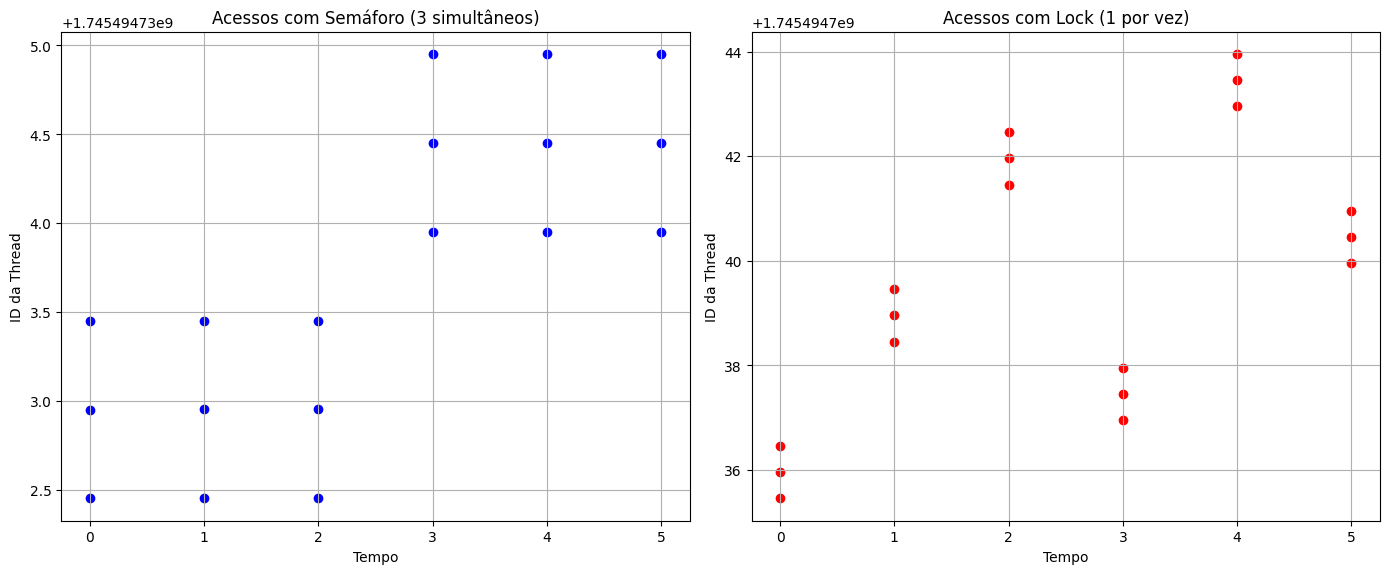

In [ ]:
import threading
import time
import matplotlib.pyplot as plt

# Número máximo de threads que podem acessar simultaneamente
MAX_RECURSOS = 3

# Semáforo permitindo até MAX_RECURSOS threads
semaforo = threading.Semaphore(MAX_RECURSOS)

# Lock tradicional (exclusão total)
lock = threading.Lock()

# Registros para visualização
acessos_com_semaforo = []
acessos_com_lock = []

# Função simulando acesso a um recurso limitado
def acessar_recurso_com_semaforo(thread_id):
    for _ in range(3):
        #semaforo.acquire()
        with semaforo:
          acessos_com_semaforo.append((thread_id, time.time()))
          time.sleep(0.5)  # Simula tempo de uso do recurso
        #semaforo.release()

# Função simulando acesso ao mesmo recurso com lock (exclusivo)
def acessar_recurso_com_lock(thread_id):
    for _ in range(3):
        #lock.acquire()
        with lock:
          acessos_com_lock.append((thread_id, time.time()))
          time.sleep(0.5)
        #lock.release()

# Criar e executar threads para ambos os casos
def simular_acessos():
    threads_semaforo = [threading.Thread(target=acessar_recurso_com_semaforo, args=(i,)) for i in range(6)]
    threads_lock = [threading.Thread(target=acessar_recurso_com_lock, args=(i,)) for i in range(6)]

    # Iniciar com semáforo
    for t in threads_semaforo:
        t.start()
    for t in threads_semaforo:
        t.join()

    # Iniciar com lock
    for t in threads_lock:
        t.start()
    for t in threads_lock:
        t.join()

# Executar simulação
simular_acessos()

# Preparar dados para o gráfico
tempos_s, ids_s = zip(*acessos_com_semaforo)
tempos_l, ids_l = zip(*acessos_com_lock)

# Plotar
plt.figure(figsize=(14, 6))

# Semáforo
plt.subplot(1, 2, 1)
plt.scatter(tempos_s, ids_s, c='blue')
plt.title("Acessos com Semáforo (3 simultâneos)")
plt.xlabel("Tempo")
plt.ylabel("ID da Thread")
plt.grid(True)

# Lock
plt.subplot(1, 2, 2)
plt.scatter(tempos_l, ids_l, c='red')
plt.title("Acessos com Lock (1 por vez)")
plt.xlabel("Tempo")
plt.ylabel("ID da Thread")
plt.grid(True)

plt.tight_layout()
plt.show()


🔵 Semáforo (à esquerda):
Permite até 3 threads ao mesmo tempo usando o recurso.

As marcações (bolinhas) mostram várias threads diferentes acessando em paralelo.

Esse comportamento é ideal quando temos vários recursos disponíveis, como:

Vagas de conexão a banco de dados.

Impressoras disponíveis.

Máquinas em uma fila de produção.

🔴 Lock (à direita):
Apenas uma thread por vez consegue acessar o recurso.

O acesso é completamente sequencial.

Bom para proteção total, mas ineficiente se você tiver múltiplos recursos e usar lock como se fosse um único gargalo.

📚 Conclusão Didática:

Apenas um recurso deve ser usado por vez:	Lock
Vários recursos iguais (ex: 3 impressoras):	Semaphore(n)
Controle total e simples:	Lock
Controle mais flexível:	Semaphore